# Logistic Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('candy-data.csv')

In [3]:
df = df.drop_duplicates()

In [4]:
df.head(5)
df.tail(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [5]:
df = df.dropna()

In [6]:
df.shape

(85, 13)

In [7]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


#### we add column "competitorname" it is unique and can be used as identity , and "chocolate" because it is a target

In [8]:
x = df.drop(columns = {'competitorname','chocolate'})
y = df['chocolate']


In [9]:
x

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...
80,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [10]:
y

0     1
1     1
2     0
3     0
4     0
     ..
80    0
81    0
82    0
83    0
84    1
Name: chocolate, Length: 85, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression() 


#### x_train: The practice questions in the textbook that the student studies to learn the material.
#### y_train: The answers at the back of the textbook that the student uses to check their work while studying.
#### x_test: The brand-new exam questions that the student has never seen before.
#### y_test: The answer key for the exam, kept by the teacher, that will be used to grade the student's performance.

## this command will train our model

In [14]:
lg.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### y_pred is the value we will predict, we are using x_test coz it is a fresh datase for which we have to predict

In [15]:
y_pred = lg.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#### annot = true will display the integer count of each data set

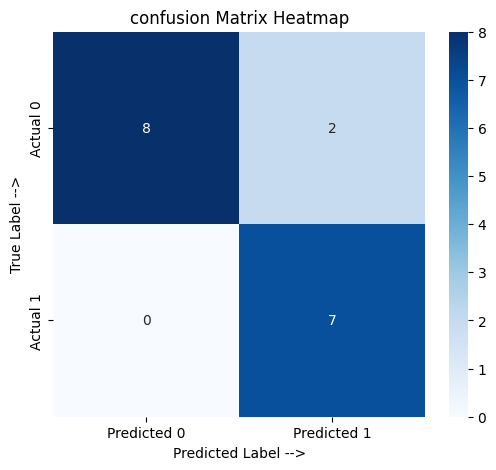

In [17]:
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label -->')
plt.ylabel('True Label -->')
plt.title('confusion Matrix Heatmap')
plt.show()

In [50]:
import sklearn.metrics as matrics
print("Accuracy" , matrics.accuracy_score(y_test, y_pred))
print("Precession", matrics.precision_score(y_test, y_pred))
print("Recall", matrics.recall_score(y_test, y_pred))

Accuracy 0.9090909090909091
Precession 1.0
Recall 0.8
